In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


import tensorflow

from keras.layers import Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.regularizers import L1, L2, L1L2
from keras.layers import Dropout

from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [ ]:
# creating new images using Data Augmentation
import os


base_directory = r"C:\Users\MA\Desktop\TB prediction using CNN\Tuberculosis"
save_directory = r"C:\Users\MA\Desktop\TB prediction using CNN\preview_TB"
num_images_to_generate = 2800
batch_size = 5

datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = False,
    fill_mode = 'nearest',
    brightness_range=[0.8, 1.2],  # Random brightness adjustments between 80% and 120%
    channel_shift_range=0.1
)

original_images = [f for f in os.listdir(base_directory) if f.endswith('.png')]  # Adjust extensions as needed

# Loop through original images to generate augmented images
for img_name in original_images:
    img_path = os.path.join(base_directory, img_name)
    img = load_img(img_path)  # Load the image
    x = img_to_array(img)     # Convert it to a numpy array
    x = x.reshape((1,) + x.shape)  # Reshape it to (1, height, width, channels)


# Generate augmented images and save them
    i = 0
    for batch in datagen.flow(x, batch_size=batch_size, save_to_dir=save_directory,
                              save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= num_images_to_generate // len(original_images):  # Generate per original image
            break  # Stop after generating enough images


### Building CNN 

In [2]:
cnn = Sequential()

In [3]:
cnn.add(Conv2D(16, (2,2), input_shape = (256,256,3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Conv2D(32, (2,2), activation = 'relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Conv2D(64, (2,2), activation = 'relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Conv2D(128, (2,2), activation = 'relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))


cnn.add(Flatten())

C:\Users\MA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
#cnn.add(Dense(256, activation= 'relu'))
#cnn.add(BatchNormalization())
#cnn.add(Dropout(0.2))

cnn.add(Dense(128, activation= 'relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Dense(64, activation= 'relu'))
cnn.add(BatchNormalization())
#cnn.add(Dropout(0.2))

cnn.add(Dense(32, activation= 'relu'))
cnn.add(BatchNormalization())
#cnn.add(Dropout(0.2))

cnn.add(Dense(16, activation= 'relu'))
cnn.add(BatchNormalization())
#cnn.add(Dropout(0.2))

cnn.add(Dense(8, activation= 'relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))


cnn.add(Dense(1, activation = 'sigmoid'))

### Compiling our Model

In [5]:
adam_optimizer = Adam(learning_rate=0.001)

cnn.compile(loss = 'binary_crossentropy', optimizer = adam_optimizer, metrics = ['accuracy'])

## Loading and Training our Model

In [7]:
early_stopping = EarlyStopping( patience=5, restore_best_weights=True)


train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=30,        # Random rotation between 0 and 40 degrees
        brightness_range=[0.8, 1.2],  # Random brightness adjustments between 80% and 120%
        channel_shift_range=0.1   # Random contrast changes by shifting pixel intensity
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r"C:\Users\MA\Desktop\TB prediction using CNN\Training Data",
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary',
        shuffle =True)

test_generator = test_datagen.flow_from_directory(
        r"C:\Users\MA\Desktop\TB prediction using CNN\Testing data",
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary',
        shuffle=False)

history = cnn.fit(
        train_generator,
        epochs=15,
        validation_data=test_generator, callbacks = [early_stopping])

Found 4492 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/15


C:\Users\MA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7311 - loss: 0.5540 - val_accuracy: 0.5000 - val_loss: 1.1681
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.8607 - loss: 0.3487 - val_accuracy: 0.5475 - val_loss: 0.8325
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.8899 - loss: 0.2774 - val_accuracy: 0.9250 - val_loss: 0.2731
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.8822 - loss: 0.3042 - val_accuracy: 0.9200 - val_loss: 0.2447
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.8819 - loss: 0.2949 - val_accuracy: 0.9350 - val_loss: 0.2131
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.8977 - loss: 0.2726 - val_accuracy: 0.8675 - val_loss: 0.3458
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 1812s 13s/step - accuracy: 0.9027 - loss: 0.2508 - val_accuracy: 0.8475 - val_loss: 0.3242
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.8944 - loss: 0.2642 - val_accuracy: 0.7

# Results

In [8]:
# checking accuracy of model
loss, accuracy = cnn.evaluate(test_generator)

print(f'\nTest Accuracy is {accuracy}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step - accuracy: 0.9200 - loss: 0.2618

Test Accuracy is 0.9350000023841858


### Training and Validation Accuracy

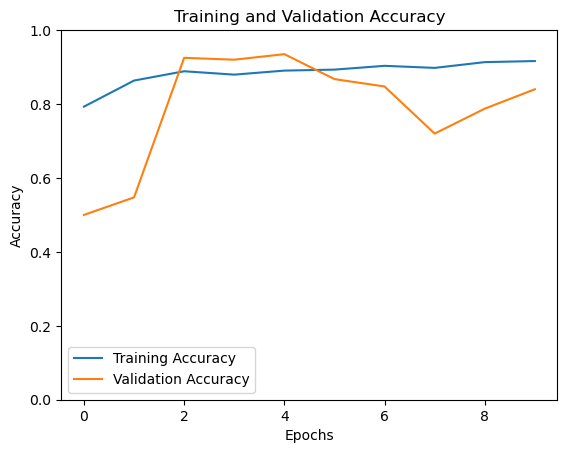

In [9]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim(0, 1.00)
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

### Training and Validation Loss

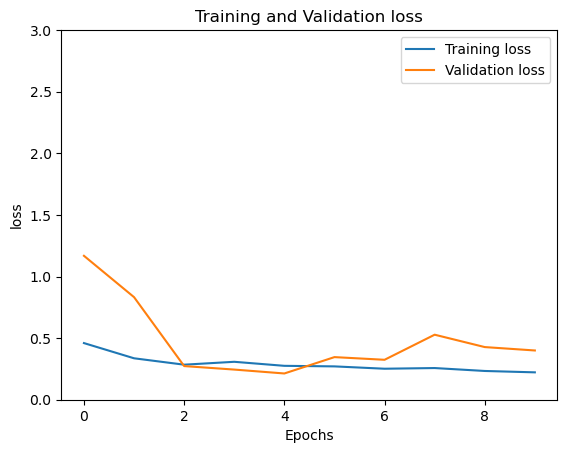

In [10]:
# Plot training accuracy
plt.plot(history.history['loss'], label='Training loss')
# Plot validation accuracy
plt.plot(history.history['val_loss'], label='Validation loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.ylim(0, 3.00)
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

### Classification Report and Confusion Metrix

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 499ms/step
Classification Report:
              precision    recall  f1-score   support

      Not TB       0.96      0.91      0.93       200
          TB       0.91      0.96      0.94       200

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.93       400
weighted avg       0.94      0.94      0.93       400



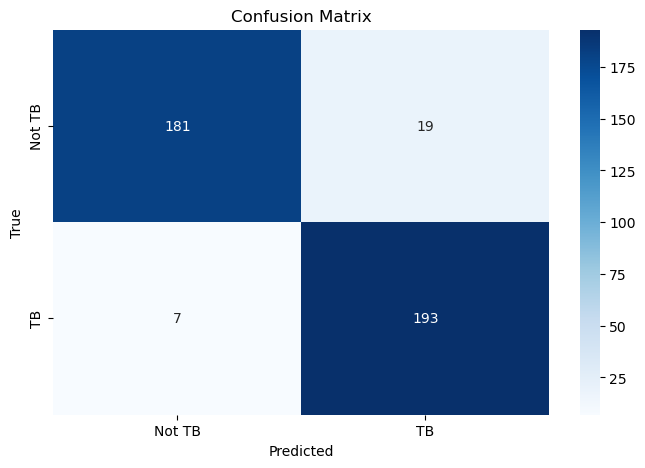

In [11]:
# Predict on test data
y_pred = cnn.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels

# Extract true labels from test_generator
y_test = test_generator.classes

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not TB', 'TB']))  # Assuming binary classification 'Not TB' and 'TB'

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not TB', 'TB'], yticklabels=['Not TB', 'TB'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()